In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the train Dataset:
- We Import the Dataset and take a quick look at 3 random rows:

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
243371,2012-02-06 20:00:00,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Monday,NORTHERN,NONE,800 Block of MCALLISTER ST,-122.425211,37.779518
102303,2014-01-06 07:00:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Monday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
845015,2003-06-11 07:00:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,PARK,NONE,4600 Block of 17TH ST,-122.447296,37.761808
9952,2015-03-22 10:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,INGLESIDE,NONE,300 Block of LONDON ST,-122.434573,37.723497
531321,2007-11-13 18:10:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,CENTRAL,NONE,POLK ST / BAY ST,-122.423468,37.804354


- Next we check the columns and their types:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


Observations:
- The Dataset contains 878049 Observations of 9 Features
- the 'Dates' column is a String ( also it's plural >_> )
- We have Categorical Features: Category, DayOfWeek, PdDistrict, Resolution
- We have Geospatial Information: 'X' (Longitude) and 'Y' (Latitude)
- The 'Address' Column has some kind of structure

## The 'Dates' Column:

### Data Cleaning & Feature Engineering:

#### Check for missing values

In [4]:
train_df.Dates.isnull().any()

False

#### Check for typos by making sure that all values match a Regular Expression

In [5]:
train_df.Dates.str.match('\d\d\d\d-\d\d-\d\d').all()

True

#### First, let's rename the Column (all column names are singular except this one!)

In [6]:
train_df.rename(columns={'Dates': 'DateTime'}, inplace=True)
train_df.columns

Index(['DateTime', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

#### Now Let's parse the dates from String to Datetime

In [7]:
train_df.DateTime = pd.to_datetime(train_df.DateTime)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
DateTime      878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


#### Create separate columns for 'Year', 'Month', 'Hour'

In [8]:
train_df['Year'] = train_df.DateTime.dt.year
train_df['Year'].sample(3)

669659    2005
532358    2007
738241    2004
Name: Year, dtype: int64

In [9]:
train_df['Month'] = train_df.DateTime.dt.month
train_df['Month'].sample(3)

447012    1
449515    1
220558    6
Name: Month, dtype: int64

In [10]:
train_df['Hour'] = train_df.DateTime.dt.hour
train_df['Hour'].sample(3)

222462    15
238533    11
160114    12
Name: Hour, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
DateTime      878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
Year          878049 non-null int64
Month         878049 non-null int64
Hour          878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 80.4+ MB


#### Let's Check the range of Dates:

In [12]:
train_df.DateTime.min(), train_df.DateTime.max()

(Timestamp('2003-01-06 00:01:00'), Timestamp('2015-05-13 23:53:00'))

## Crimes per Year visualization:

In [13]:
gb = train_df.groupby('Year')['Descript'].count()
gb

Year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Descript, dtype: int64

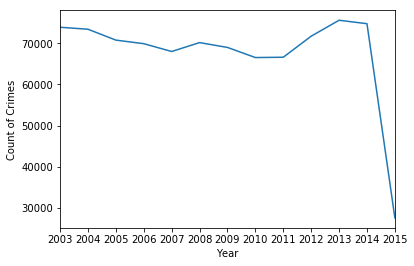

In [14]:
ax = gb.plot(kind='line', xticks=gb.index.values)
ax.set_ylabel('Count of Crimes')

#### We can see that Number of crimes in the last year (2015) is significantly lower, most probably because the data was collected before the year ended ( we'll check that later )

## Crimes per Day Of Week visualization:

#### Let's Check how many crimes are commited in each day

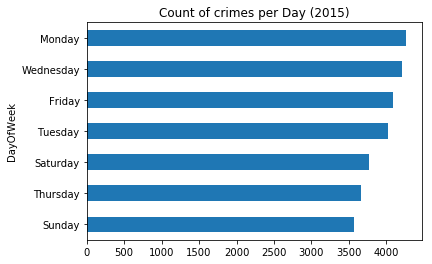

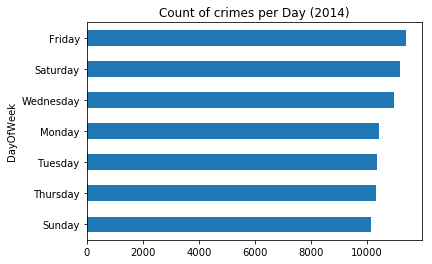

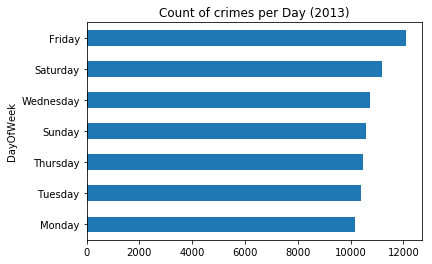

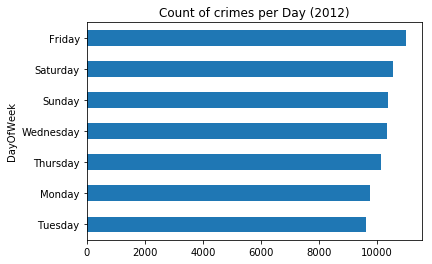

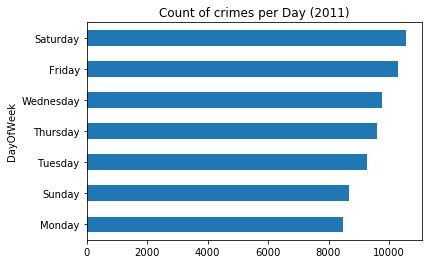

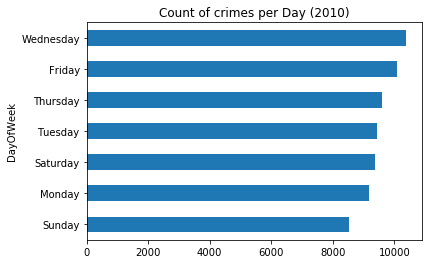

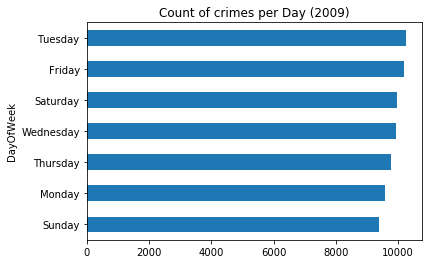

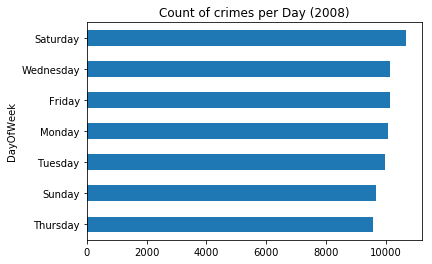

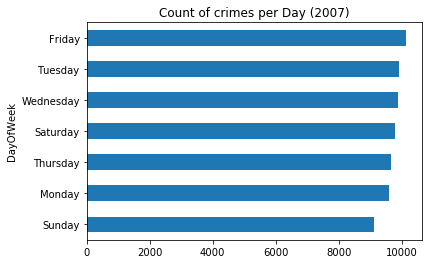

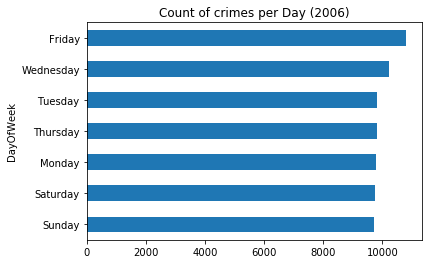

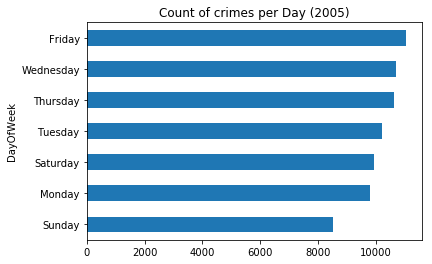

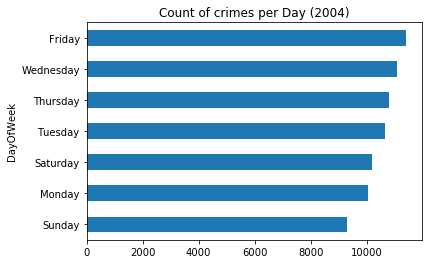

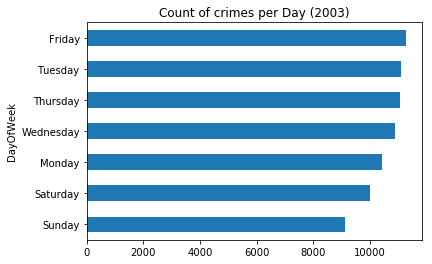

In [54]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('DayOfWeek')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

#### We notice that Friday almost always takes the top place.

## Crimes per Month visualization:

#### Let's Check if there are any patterns regarding the months :

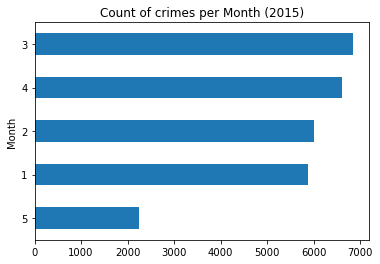

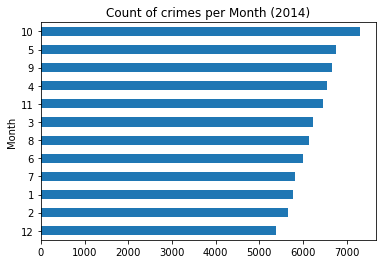

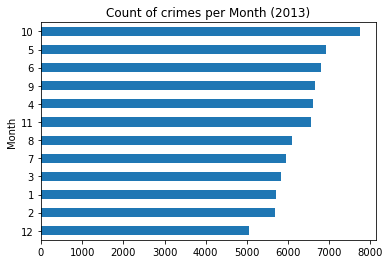

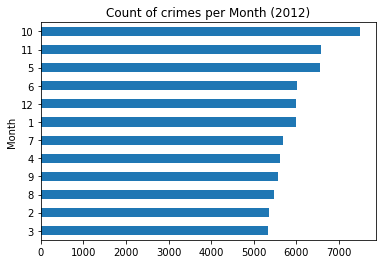

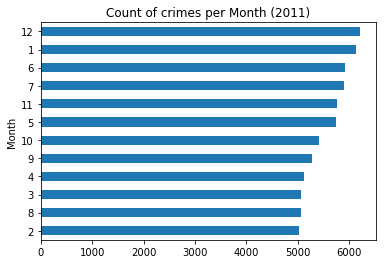

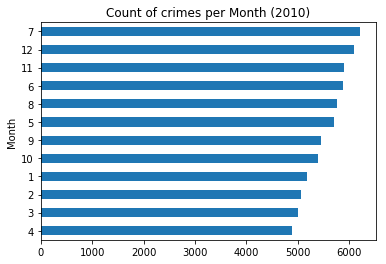

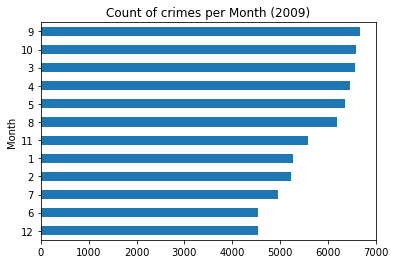

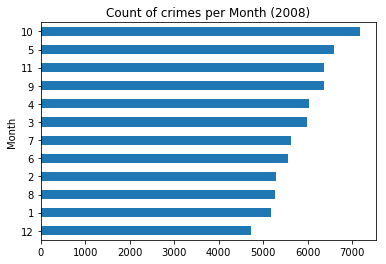

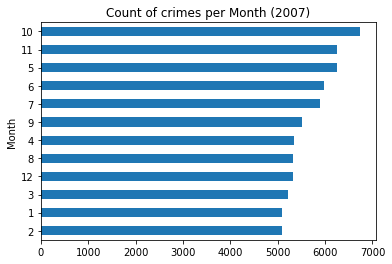

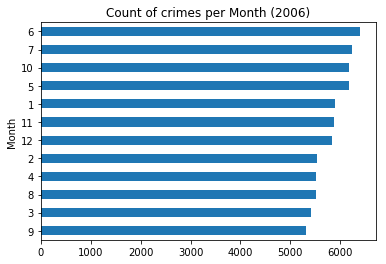

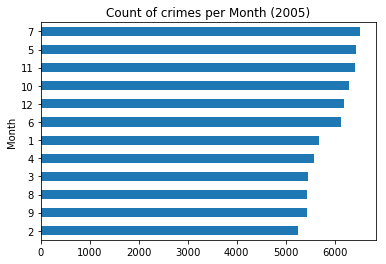

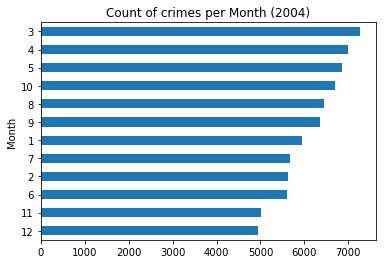

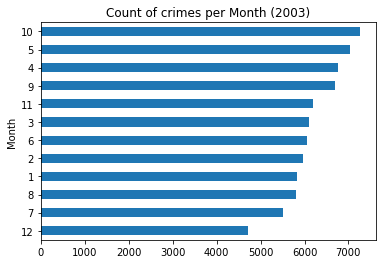

In [58]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('Month')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Month ({y})', fig=(16,5))
    plt.show()

#### We confirm that the data for year 2015 is incomplete ( only 5 months of data is present )

## Output to CSV

In [15]:
train_df.to_csv('data/train_clean_1.csv',index=False)
print('Done Outputing')

Done Outputing
